## Optical Bloch Equations without damping

In [6]:
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

$$ \dot{\mathbf{R}} = \mathbf{R}\times\mathbf{W}-\frac{\Gamma}{2}\mathbf{R}+\frac{\Gamma}{2}\cdot
\begin{pmatrix}
    0 \\
    0 \\
    1    
\end{pmatrix}$$

In [7]:
def dR(R,t,Δ,Γ,f):
    W = np.array([1,0,Δ-f*t])
    return np.cross(R,W)-(Γ/2)*R+np.array([0,0,Γ/2], dtype='float32')

In [8]:
def unitcircle(axes):
    a = np.linspace(0, 2 * np.pi, 100)
    b = np.linspace(0, np.pi, 100)
    x = 1 * np.outer(np.cos(a), np.sin(b))
    y = 1 * np.outer(np.sin(a), np.sin(b))
    z = 1 * np.outer(np.ones(np.size(a)), np.cos(b))
    axes.plot(np.sin(a),np.cos(a),color='k', linewidth=0.2)
    axes.plot(np.sin(a),np.cos(a),zdir='x',color='k', linewidth=0.2)
    axes.plot(np.sin(a),np.cos(a),zdir='y',color='k', linewidth=0.2)
    axes.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=1, alpha=0.1)

In [9]:
def makeplot(T, N, Δ, Γ, axes, dΔ=False):
    global dR
    if dΔ:
        f=2*Δ/T
    else: f=0
    R0 = np.array([0,0,1], dtype='float32')
    t = np.linspace(0, T, num=N)
    R = sp.odeint(dR, R0, t, args=(Δ, Γ, f))
    axes.plot(R[:,0],R[:,1],R[:,2],linewidth=0.5)

<IPython.core.display.Javascript object>


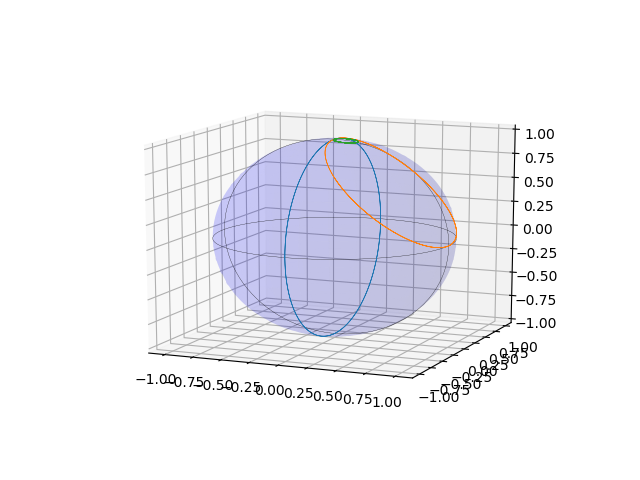

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

unitcircle(ax)
makeplot(2*np.pi*2,1000,0,0,ax)
makeplot(2*np.pi*2,2000,1,0,ax)
makeplot(2*np.pi*2,10000,10,0,ax)

<IPython.core.display.Javascript object>


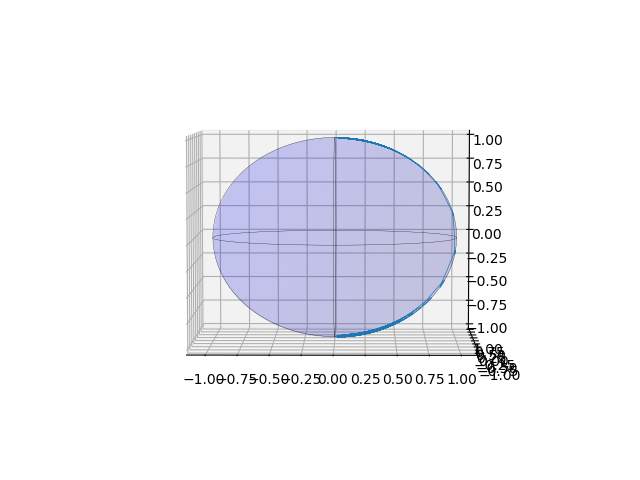

In [15]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

unitcircle(ax2)
makeplot(2*np.pi*50,1000,10,0,ax2,dΔ=True)